## Importacion de Librerias y Carga de Datos

In [1]:
# importacion de librerias

import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("datasets/propiedades_scrapeadas_2025-08-21.csv")

df.head(5)

,url,precio,Dormitorios,Baños,Superficie,Superficie Construida,Superficie Terreno,Superficie Balcones,Garage,Parrillero,Orientación,Cocina,Año de Construcción,Jardín,Dormitorios Servicio,Calefacción,Acepta Mascotas,Piscina,Plantas,Seguridad,Disposición,Lavadero,Dormitorios Suite,Propiedad Horizontal,Muebles,Pisos Edificio,Altura,Aptos por piso,Gastos Comúnes,Patio,Piso
0,https://www.casasymas.com.uy/propiedad/82127-v...,U$S 240.000Venta,4,3.0,390 m²,302m²,390m²,8m²,Garaje: 4,Parrillero,Este,Cocina Definida,1978.0,Jardín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.casasymas.com.uy/propiedad/177316-...,U$S 850.000Venta,4,2.0,612 m²,328m²,612m²,NaN,Garaje: 4,NaN,NaN,Cocina Definida,1945.0,Jardín,Dormitorios de Servicio: 1,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.casasymas.com.uy/propiedad/194470-...,U$S 267.000Venta,5,3.0,301 m²,174m²,NaN,NaN,Garaje: 1,NaN,Este,Cocina Definida,1.0,NaN,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.casasymas.com.uy/propiedad/195384-...,U$S 215.000Venta,2,2.0,161 m²,90m²,451m²,NaN,Cochera: 4,Parrillero,Este,Cocina Integrada,1937.0,NaN,NaN,esfufa alto rendimiento,Acepta Mascotas,Piscina,1.0,"rejas, alarma, cerca electrica",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.casasymas.com.uy/propiedad/174669-...,U$S 395.000Venta,4,2.0,345 m²,185m²,160m²,NaN,Garaje: 4,NaN,Sur,Cocina Definida,1975.0,Jardín,NaN,NaN,Acepta Mascotas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1635 non-null   object 
 1   precio                 1635 non-null   object 
 2   Dormitorios            1635 non-null   object 
 3   Baños                  1580 non-null   float64
 4   Superficie             1483 non-null   object 
 5   Superficie Construida  1493 non-null   object 
 6   Superficie Terreno     1282 non-null   object 
 7   Superficie Balcones    297 non-null    object 
 8   Garage                 1092 non-null   object 
 9   Parrillero             386 non-null    object 
 10  Orientación            794 non-null    object 
 11  Cocina                 1098 non-null   object 
 12  Año de Construcción    1031 non-null   float64
 13  Jardín                 649 non-null    object 
 14  Dormitorios Servicio   275 non-null    object 
 15  Cale

# Limpieza de datos

## Eliminamos duplicados del dataset

In [5]:
# vemos los duplicados que hay en el dataset 

duplicados = df.duplicated()
print(f'Duplicados encontrados: {duplicados.sum()}')

Duplicados encontrados: 571


In [6]:
# dropeamos los duplicados del dataset por url 

df = df.drop_duplicates(subset='url')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 0 to 1634
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    1064 non-null   object 
 1   precio                 1064 non-null   object 
 2   Dormitorios            1064 non-null   object 
 3   Baños                  1032 non-null   float64
 4   Superficie             967 non-null    object 
 5   Superficie Construida  973 non-null    object 
 6   Superficie Terreno     843 non-null    object 
 7   Superficie Balcones    187 non-null    object 
 8   Garage                 718 non-null    object 
 9   Parrillero             242 non-null    object 
 10  Orientación            518 non-null    object 
 11  Cocina                 720 non-null    object 
 12  Año de Construcción    670 non-null    float64
 13  Jardín                 426 non-null    object 
 14  Dormitorios Servicio   186 non-null    object 
 15  Calefacci

## DROP DE COLUMNAS -- CRITERIO 

Vamos a dropear todas las columnas que tengan menos de 650 datos como criterio inicial. Luego podemos ver de cambiarlo, pero eso será el criterio inicial. 

In [8]:
# Calcular el número de valores no nulos por columna
non_null_counts = df.notnull().sum()

# Identificar las columnas a eliminar (non-null count < 650)
columns_to_drop = non_null_counts[non_null_counts < 650].index

# Eliminar las columnas identificadas
df = df.drop(columns=columns_to_drop)

# Mostrar las columnas restantes
print("Columnas restantes:", df.columns)

Columnas restantes: Index(['url', 'precio', 'Dormitorios', 'Baños', 'Superficie',
       'Superficie Construida', 'Superficie Terreno', 'Garage', 'Cocina',
       'Año de Construcción'],
      dtype='object')


In [9]:
df = df.drop(columns=['Superficie', 'Dormitorios Suite', 'Orientación', 'Cocina', 'Año de Construcción', 'Disposición'], errors='ignore')

In [10]:
df.head()

,url,precio,Dormitorios,Baños,Superficie Construida,Superficie Terreno,Garage
0,https://www.casasymas.com.uy/propiedad/82127-v...,U$S 240.000Venta,4,3.0,302m²,390m²,Garaje: 4
1,https://www.casasymas.com.uy/propiedad/177316-...,U$S 850.000Venta,4,2.0,328m²,612m²,Garaje: 4
2,https://www.casasymas.com.uy/propiedad/194470-...,U$S 267.000Venta,5,3.0,174m²,NaN,Garaje: 1
3,https://www.casasymas.com.uy/propiedad/195384-...,U$S 215.000Venta,2,2.0,90m²,451m²,Cochera: 4
4,https://www.casasymas.com.uy/propiedad/174669-...,U$S 395.000Venta,4,2.0,185m²,160m²,Garaje: 4


## Limpieza de campos 

Algunos campos tienen incoherencias entonces queremos dejarlos lo mas limpio posibles para nuestro analisis. 

In [11]:
# columna "precio" -> eliminamos el "U$S" y "Venta"

df['precio'] = df['precio'].str.replace("U\\$S", "", regex=True)
df['precio'] = df['precio'].str.replace("Venta", "", regex=True)
df['precio'] = df['precio'].str.replace(".", "", regex=False)
df['precio'] = df['precio'].str.strip()
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')

print(df['precio'].head())

0    240000.0
1    850000.0
2    267000.0
3    215000.0
4    395000.0
Name: precio, dtype: float64


In [12]:
# # columna "Gastos Comúnes" -> sacar "$U", "UYU", "U$S"

# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("U\\$S", "", regex=True)
# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("$U", "", regex=True)
# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.replace("UYU", "", regex=True)
# df['Gastos Comúnes'] = df['Gastos Comúnes'].str.strip()
# df['Gastos Comúnes'] = pd.to_numeric(df['Gastos Comúnes'], errors='coerce')


In [13]:
# columna "dormitorio" -> cambiamos "Monoambiente" por 0. 

df['Dormitorios'] = df['Dormitorios'].replace("Monoambiente", 0)
df['Dormitorio'] = pd.to_numeric(df['Dormitorios'], errors='coerce')

df = df.drop(columns=['Dormitorios'])

In [14]:
df.head()

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302m²,390m²,Garaje: 4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328m²,612m²,Garaje: 4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174m²,NaN,Garaje: 1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90m²,451m²,Cochera: 4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185m²,160m²,Garaje: 4,4


In [15]:
# # columna "Superficie" -> sacamos "mÂ²", dejando solo el numero 

# df['Superficie'] = df['Superficie'].str.replace("mÂ²", "", regex=False)
# df['Superficie'] = df['Superficie'].str.replace("m²", "", regex=False)

# # eliminar espacios 

# df['Superficie'] = df["Superficie"].str.strip()

# # convertir a numero 

# df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

In [16]:
# columna "Superficie Construida" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Construida'] = df['Superficie Construida'].str.replace("mÂ²", "", regex=False)
df['Superficie Construida'] = df['Superficie Construida'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Construida'] = df["Superficie Construida"].str.strip()

# convertir a numero 

df['Superficie Construida'] = pd.to_numeric(df['Superficie Construida'], errors='coerce')

In [17]:
# columna "Superficie Terreno" -> sacamos "mÂ²" y "m²", dejando solo el numero 

df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("mÂ²", "", regex=False)
df['Superficie Terreno'] = df['Superficie Terreno'].str.replace("m²", "", regex=False)

# eliminar espacios 

df['Superficie Terreno'] = df["Superficie Terreno"].str.strip()

# convertir a numero 

df['Superficie Terreno'] = pd.to_numeric(df['Superficie Terreno'], errors='coerce')

In [18]:
# # columna "Superficie Balcones" -> sacamos "mÂ²" y "m²", dejando solo el numero 

# df['Superficie Balcones'] = df['Superficie Balcones'].str.replace("mÂ²", "", regex=False)
# df['Superficie Balcones'] = df['Superficie Balcones'].str.replace("m²", "", regex=False)

# # eliminar espacios 

# df['Superficie Balcones'] = df["Superficie Balcones"].str.strip()

# # convertir a numero 

# df['Superficie Balcones'] = pd.to_numeric(df['Superficie Balcones'], errors='coerce')

In [19]:
# # columna "Dormitorios Servicio" -> dejar solo el numero en vez de "Dormitorios de servicio: 1" que quede "1" (float)

# # Reemplazar vacíos o NaN por 0
# df['Dormitorios Servicio'] = df['Dormitorios Servicio'].fillna(0)

# # Extraer solo el número
# df['Dormitorios Servicio'] = df['Dormitorios Servicio'].astype(str).str.extract('(\d+)')

# # Reemplazar cualquier valor faltante con 0 y convertir a número
# df['Dormitorios Servicio'] = df['Dormitorios Servicio'].fillna(0).astype(int)



In [20]:
# # columna "Dormitorios Suite" -> dejar solo el numero en vez de "Dormitorios en suite: 1" que quede "1" (float)

# # Reemplazar vacíos o NaN por 0
# df['Dormitorios Suite'] = df['Dormitorios Suite'].fillna(0)

# # Extraer solo el número
# df['Dormitorios Suite'] = df['Dormitorios Suite'].astype(str).str.extract('(\d+)')

# # Reemplazar cualquier valor faltante con 0 y convertir a número
# df['Dormitorios Suite'] = df['Dormitorios Suite'].fillna(0).astype(int)

In [21]:
# columna "Garage" -> dejar solo el numero en vez de "Dormitorios en suite: 1" que quede "1" (float)

# Reemplazar vacíos o NaN por 0
df['Garage'] = df['Garage'].fillna(0)

# Extraer solo el número
df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')

# Reemplazar cualquier valor faltante con 0 y convertir a número
df['Garage'] = df['Garage'].fillna(0).astype(int)

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Felipe\AppData\Local\Temp\ipykernel_40728\4138919070.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['Garage'] = df['Garage'].astype(str).str.extract('(\d+)')


In [22]:
# # columna "Altura" -> pasamos de "3m" a "3"

# # Quitar la letra "m" y espacios
# df['Altura'] = df['Altura'].str.replace("m", "", regex=False)
# df['Altura'] = df['Altura'].str.strip()

# # Convertir a número
# df['Altura'] = pd.to_numeric(df['Altura'], errors='coerce')

In [23]:
# drop de filas con NaN en precio

df = df[df['precio'].notna()]

In [24]:
# chequeamos que no quede nada con NaN en precio

df[df['precio'].isna()]

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio


In [25]:
# df[df['Aptos por piso'].notna()]

In [26]:
df.head()

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4


In [27]:
# eliminar chacras del dataset 

rows_to_drop = df[df['Superficie Terreno'] > 20000].index

df = df.drop(rows_to_drop)

df.head(10)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4
5,https://www.casasymas.com.uy/propiedad/178685-...,775000.0,2.0,199.0,300.0,0,2
6,https://www.casasymas.com.uy/propiedad/119384-...,135000.0,1.0,99.0,57.0,0,2
7,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,2.0,150.0,498.0,1,3
8,https://www.casasymas.com.uy/propiedad/128325-...,175000.0,2.0,100.0,NaN,0,3
9,https://www.casasymas.com.uy/propiedad/186448-...,695000.0,4.0,249.0,321.0,2,4


In [28]:
df.head(10)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4
5,https://www.casasymas.com.uy/propiedad/178685-...,775000.0,2.0,199.0,300.0,0,2
6,https://www.casasymas.com.uy/propiedad/119384-...,135000.0,1.0,99.0,57.0,0,2
7,https://www.casasymas.com.uy/propiedad/190507-...,172000.0,2.0,150.0,498.0,1,3
8,https://www.casasymas.com.uy/propiedad/128325-...,175000.0,2.0,100.0,NaN,0,3
9,https://www.casasymas.com.uy/propiedad/186448-...,695000.0,4.0,249.0,321.0,2,4


In [29]:
# # categorizar parrillero

# df['Parrillero'] = df['Parrillero'].apply(lambda x: 1 if 'Parrillero' in str(x) else 0)

# df.head(5)

## Transformar COCINA 

In [30]:
# # Obtener valores únicos de la columna 'Cocina'
# valores_unicos_cocina = df['Cocina'].unique()

# # Mostrar los valores únicos
# print("Valores únicos en la columna 'Cocina':", valores_unicos_cocina)

In [31]:
# # Definir una función para asignar valores
# def asignar_valor(cocina):
#     if pd.isna(cocina):
#         return 0
#     if isinstance(cocina, str):
#         cocina = cocina.strip().lower()
#         if cocina == 'cocina definida' or cocina == 'cocina integrada':
#             return 1
#     return 0

# # Aplicar la función a la columna 'Cocina'
# df['Cocina'] = df['Cocina'].apply(asignar_valor)

# # Mostrar los primeros 5 registros para verificar
# print(df.head(5))

In [ ]:
# df['Jardín'] = df['Jardín'].apply(lambda x: 1 if 'Jardín' in str(x) else 0)

# df.head(5)

In [ ]:
# df['Acepta Mascotas'] = df['Acepta Mascotas'].apply(lambda x: 1 if 'Acepta Mascotas' in str(x) else 0)

# df.head(5)


In [ ]:
# df['Piscina'] = df['Piscina'].apply(lambda x: 1 if 'Piscina' in str(x) else 0)

# df.head(5)

## AGREGAR BARRIOS 

In [50]:
barrios = {
    "aguada": "B",
    "aires-puros": "C", 
    "atahualpa": "C", 
    "banados-de-carrasco": "F", 
    "barrio-sur": "B", 
    "belvedere": "A",
    "brazo-oriental": "C", 
    "buceo": "CH", 
    "bella-vista": "C", 
    "capurro": "C", 
    "carrasco": "E", 
    "carrasco-norte": "E", 
    "casabo": "A", 
    "pajas-blancas": "A", 
    "casavalle": "D", 
    "castro": "D", 
    "perez-castellanos": "D", 
    "centro": "B", 
    "cerrito": "D",
    "cerro": "A", 
    "ciudad-vieja": "B", 
    "colon": "G", 
    "conciliacion": "G", 
    "cordon": "B", 
    "abayuba": "G", 
    "flor-de-maronas": "F", 
    "ituzaingo": "F", 
    "jacinto-vera": "C", 
    "jardines-del-hipodromo": "F", 
    "la-paloma": "A", 
    "la-teja": "A", 
    "larranaga": "C", 
    "las-acacias": "D", 
    "las-canteras": "E", 
    "lezica": "G", 
    "melilla": "G", 
    "malvin": "E", 
    "malvin-norte": "E", 
    "paso-de-las-duranas": "G",
    "manga": "F", 
    "toledo-chico": "D", 
    "maronas": "F", 
    "parque-guarani": "F",
    "mercado-modelo": "C", 
    "bolivar": "C", 
    "nuevo-paris": "A", 
    "palermo": "B", 
    "parque-batlle": "CH", 
    "villa-dolores": "CH", 
    "parque-rodo": "B", 
    "paso-de-la-arena": "A", 
    "penarol": "G", 
    "lavalleja": "G", 
    "piedras-blancas": "D",
    "pocitos": "CH", 
    "prado": "A", 
    "nueva-savona": "A", 
    "punta-carretas": "CH", 
    "punta-gorda": "E", 
    "punta-rieles": "F", 
    "bella-italia": "F", 
    "reducto": "C", 
    "sayago": "G", 
    "tres-cruces": "B",  
    "tres-ombues": "A", 
    "victoria": "A",
    "union": "D", 
    "villa-espanola": "D", 
    "villa-garcia": "F", 
    "villa-munoz": "C", 
    "paso-molino": "A", 
    "la-comercial": "B",
    "san-nicolas": "E", 
    "goes": "C", 
    "parque-rivera": "E", 
    "la-blanqueada": "CH", 
    "la-figurita": "C"
}

barrios_sorted = sorted(barrios, key=len, reverse = True)

def extraer_barrios_de_url(url: str) -> str | None:
    for barrio in barrios_sorted:
        if barrio in url: 
            return barrio
    return None

df["barrio"] = df["url"].apply(extraer_barrios_de_url)
df["municipio"] = df["barrio"].map(barrios)


In [51]:
df.head(5)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4,paso-molino,A
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4,prado,A
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5,centro,B
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2,la-teja,A
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4,prado,A


In [52]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 61


In [53]:
df = df.dropna(subset=["barrio"]).reset_index(drop=True)

In [54]:
# Cuenta la cantidad de nulos en la columna barrio
num_nulos = df["barrio"].isna().sum()

print("Cantidad de nulos en 'barrio':", num_nulos)

Cantidad de nulos en 'barrio': 0


In [55]:
df.head(5)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4,paso-molino,A
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4,prado,A
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5,centro,B
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2,la-teja,A
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4,prado,A


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    994 non-null    object 
 1   precio                 994 non-null    float64
 2   Baños                  964 non-null    float64
 3   Superficie Construida  911 non-null    float64
 4   Superficie Terreno     792 non-null    float64
 5   Garage                 994 non-null    int64  
 6   Dormitorio             994 non-null    int64  
 7   barrio                 994 non-null    object 
 8   municipio              994 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 70.0+ KB


## AGREGAR COLUMNA BARRIO 

In [57]:
barrios = df['url']

print(barrios)

0      https://www.casasymas.com.uy/propiedad/82127-v...
1      https://www.casasymas.com.uy/propiedad/177316-...
2      https://www.casasymas.com.uy/propiedad/194470-...
3      https://www.casasymas.com.uy/propiedad/195384-...
4      https://www.casasymas.com.uy/propiedad/174669-...
                             ...                        
989    https://www.casasymas.com.uy/propiedad/196265-...
990    https://www.casasymas.com.uy/propiedad/153800-...
991    https://www.casasymas.com.uy/propiedad/181506-...
992    https://www.casasymas.com.uy/propiedad/190639-...
993    https://www.casasymas.com.uy/propiedad/111235-...
Name: url, Length: 994, dtype: object


## COMIENZA EDA

In [58]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [63]:
df.head(5)

,url,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio,barrio,municipio
0,https://www.casasymas.com.uy/propiedad/82127-v...,240000.0,3.0,302.0,390.0,4,4,paso-molino,A
1,https://www.casasymas.com.uy/propiedad/177316-...,850000.0,2.0,328.0,612.0,4,4,prado,A
2,https://www.casasymas.com.uy/propiedad/194470-...,267000.0,3.0,174.0,NaN,1,5,centro,B
3,https://www.casasymas.com.uy/propiedad/195384-...,215000.0,2.0,90.0,451.0,4,2,la-teja,A
4,https://www.casasymas.com.uy/propiedad/174669-...,395000.0,2.0,185.0,160.0,4,4,prado,A


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    994 non-null    object 
 1   precio                 994 non-null    float64
 2   Baños                  964 non-null    float64
 3   Superficie Construida  911 non-null    float64
 4   Superficie Terreno     792 non-null    float64
 5   Garage                 994 non-null    int64  
 6   Dormitorio             994 non-null    int64  
 7   barrio                 994 non-null    object 
 8   municipio              994 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 70.0+ KB


In [65]:
df.describe()

,precio,Baños,Superficie Construida,Superficie Terreno,Garage,Dormitorio
count,9.940000e+02,964.000000,911.000000,792.000000,994.000000,994.000000
mean,4.809288e+05,2.603734,207.149286,458.761364,1.165996,3.520121
std,4.617780e+05,1.619144,154.760956,875.995639,1.318247,1.940219
min,3.350000e+02,1.000000,16.000000,4.000000,0.000000,0.000000
25%,1.799250e+05,2.000000,100.000000,128.000000,0.000000,3.000000
50%,3.300000e+05,2.000000,156.000000,260.000000,1.000000,3.000000
75%,6.000000e+05,3.000000,270.000000,540.500000,2.000000,4.000000
max,4.300000e+06,24.000000,1600.000000,12907.000000,10.000000,24.000000


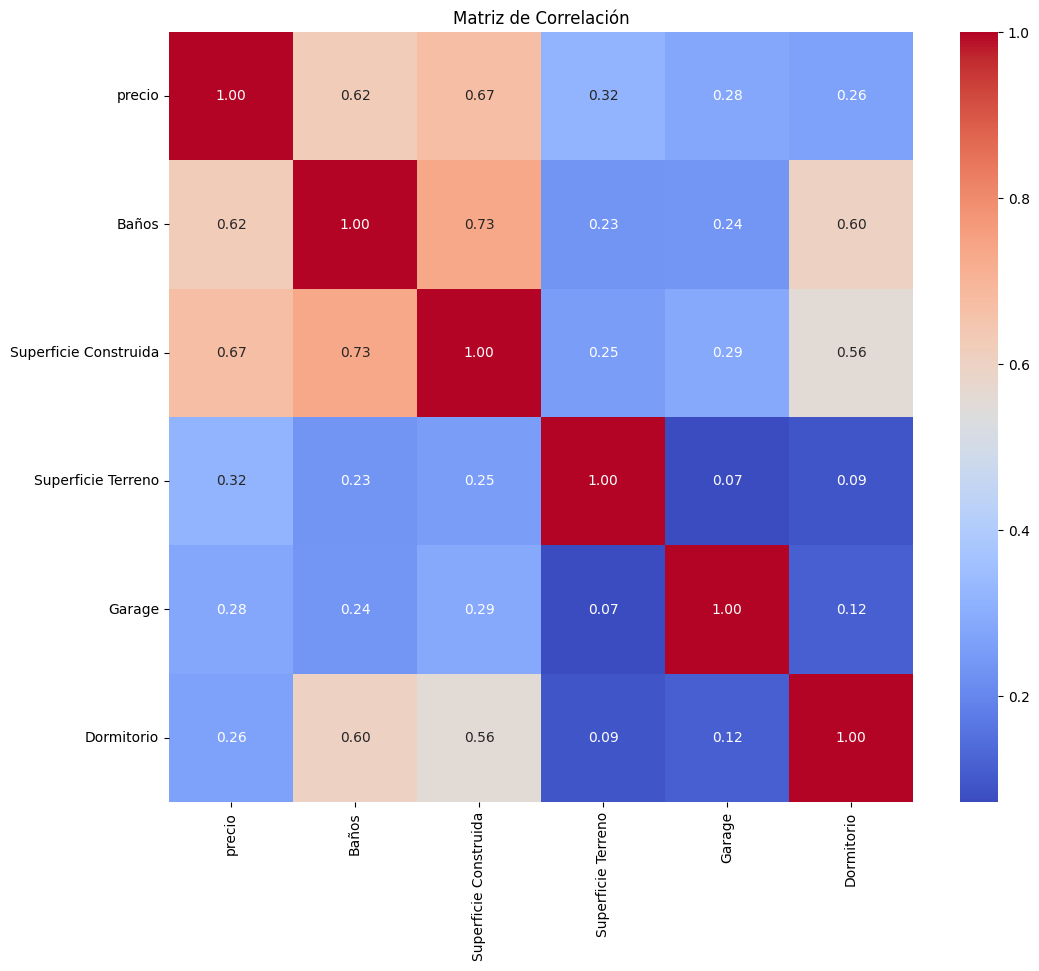

In [62]:
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo las columnas numéricas
correlation_matrix = numeric_df.corr()

# Crea un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Muestra el gráfico
plt.title('Matriz de Correlación')
plt.show()

## Boxplots

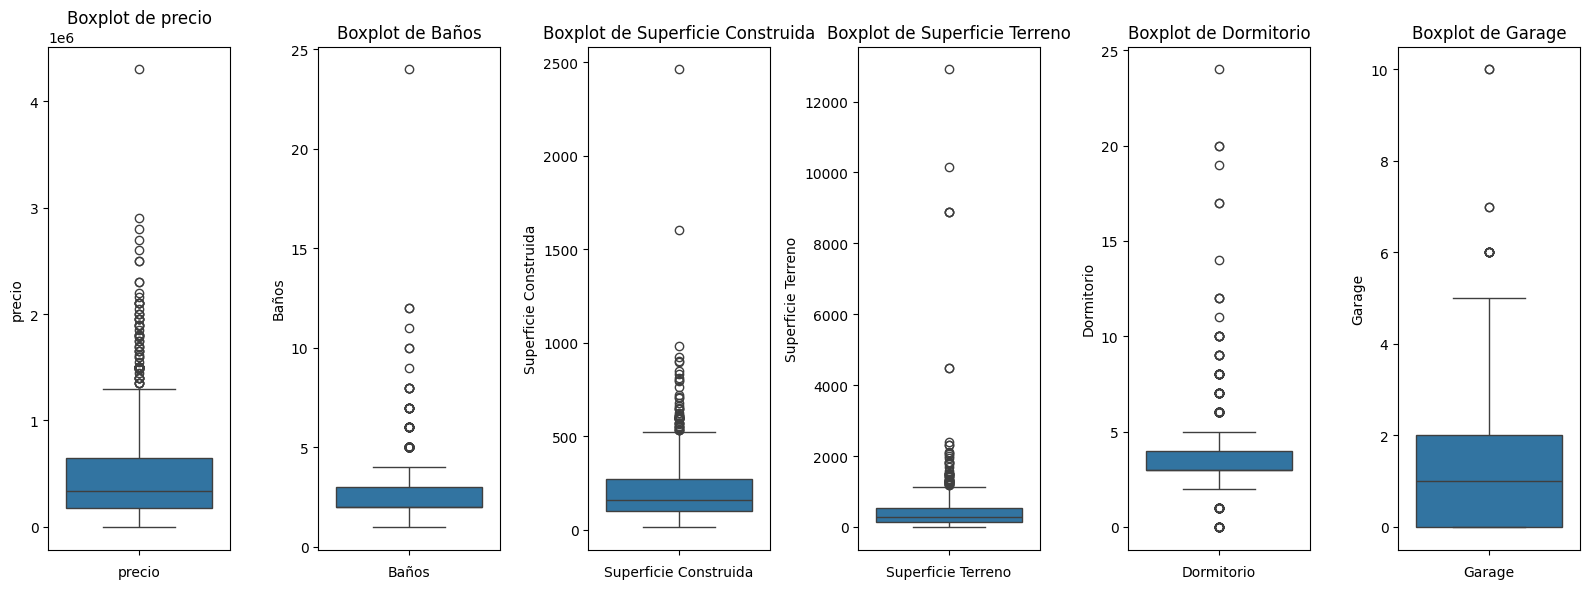

In [ ]:
# Lista de las columnas que quieres graficar
columnas_interes = ['precio', 'Baños', 'Superficie Construida', 'Superficie Terreno', 'Dormitorio', 'Garage']

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, len(columnas_interes), figsize=(16, 6))

# Iterar sobre las columnas y los ejes para crear un boxplot para cada columna
for ax, col in zip(axes, columnas_interes):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlabel(col)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

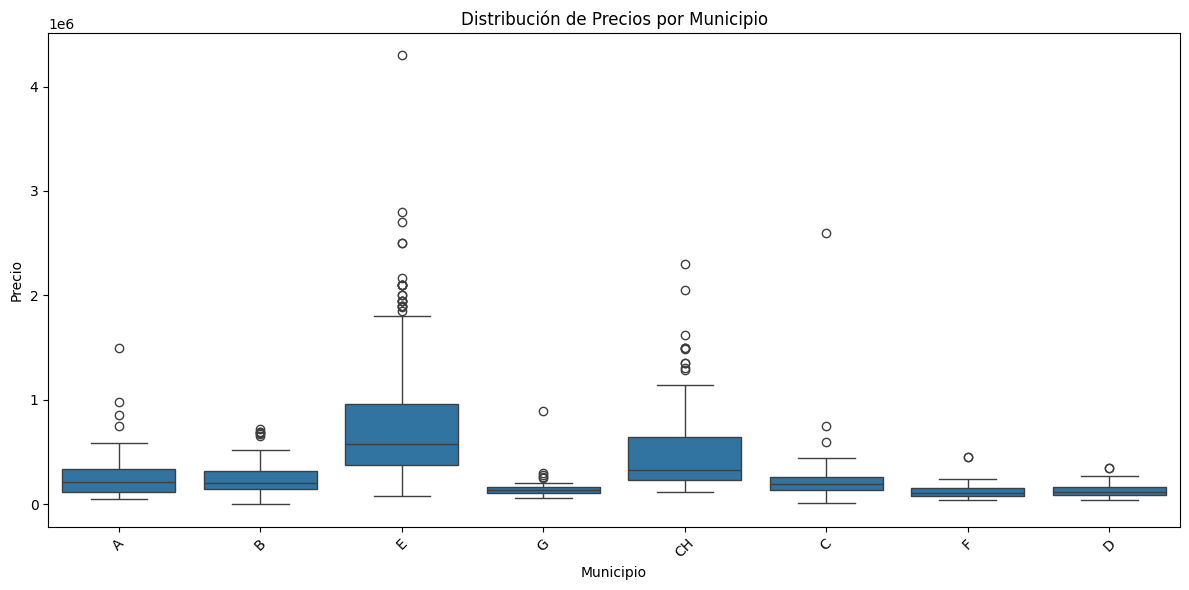

In [66]:
# Asegúrate de que 'df' tiene las columnas 'municipio' y 'precio'
# Aquí 'precio' es la columna que contiene los precios que quieres graficar

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='municipio', y='precio', data=df)

# Añadir título y etiquetas
plt.title('Distribución de Precios por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son largas
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas
plt.show()

In [67]:
# Asegúrate de que 'df' es tu DataFrame y 'precio' es la columna que contiene los precios
precios_ordenados = df['precio'].sort_values(ascending=False)

# Mostrar los precios ordenados
print(precios_ordenados)

106    4300000.0
347    2800000.0
149    2700000.0
821    2600000.0
964    2500000.0
         ...    
789      43000.0
102      39000.0
731       8000.0
445        350.0
312        335.0
Name: precio, Length: 994, dtype: float64
